In [1]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import logging
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rc('font',family='SimHei', size=13)
# os.chdir('')

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv('pima-indians-diabetes.data.csv',names=list('abcdefgh')+['target'])

In [21]:
data['a'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [22]:
data['a'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: a, dtype: int64

In [23]:
def cal_range_value(df,col):
    return df.groupby(col).agg({'y':['count', 'mean']})


In [25]:
result_df=cal_range_value(data, 'a')
result_df

y          
   count      mean
a                 
0    111  0.342342
1    135  0.214815
2    103  0.184466
3     75  0.360000
4     68  0.338235
5     57  0.368421
6     50  0.320000
7     45  0.555556
8     38  0.578947
9     28  0.642857
10    24  0.416667
11    11  0.636364
12     9  0.444444
13    10  0.500000
14     2  1.000000
15     1  1.000000
17     1  1.000000

In [35]:
result_df.columns=result_df.columns.droplevel()

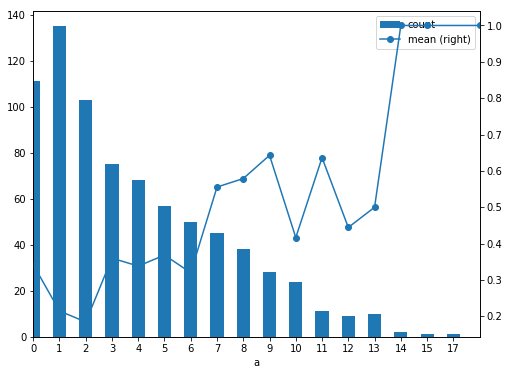

In [46]:
figure,ax=plt.subplots(figsize=(8,6))
result_df.plot(y='count',kind='bar',ax=ax)
result_df.plot(y='mean',kind='line',ax=ax,secondary_y=True,style='-o')

In [54]:
pd.DataFrame([[1,0]],columns=list('ab'),index=[0])

,a,b
0,1,0


In [57]:
data.groupby('a').agg({'a':'count'})

,a
a,
0,111
1,135
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [58]:
data.groupby('a').agg({'a':'count'}).cumsum()

,a
a,
0,111
1,246
2,349
3,424
4,492
5,549
6,599
7,644
8,682


In [6]:
data.head()

,a,b,c,d,e,f,g,h,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.shape

(768, 9)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test,y_train,y_test=train_test_split(data.iloc[:,:-1], data.iloc[:,-1],test_size=0.3)

In [10]:
X_train.shape

(537, 8)

In [11]:
y_train.shape

(537,)

In [12]:
import lightgbm as lgb

In [13]:
clf=lgb.LGBMClassifier()

In [14]:
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
y_prob=clf.predict_proba(X_test)

In [16]:
y_pred=clf.predict(X_test)

In [17]:
np.save('X.npy',data.iloc[:,:-1])

In [18]:
np.save('y.npy',data.iloc[:,-1])

In [19]:
data.head()

,a,b,c,d,e,f,g,h,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
data.rename(columns={'target':'y'},inplace=True)

In [18]:
p1=np.mean(data['y']==1)


In [19]:
-p1*np.log(p1)-(1-p1)*np.log(1-p1)

0.6467994206632901

In [20]:
p1

0.3489583333333333

In [21]:
(data['y']==1).mean()

0.3489583333333333

**最优分组(决策树的ID3算法，信息熵)**

In [22]:
def cal_entr(data):
    p1=np.mean(data['y']==1)
    if p1==1 or p1==0:
        return 0
    else:
        return -p1*np.log(p1)-(1-p1)*np.log(1-p1)

In [23]:
np.sort(data['a'].unique())[:-1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [24]:
np.sort(data['d'].unique())[:-1]

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63])

In [25]:
np.sort(data['b'].unique())[:-1]

array([  0,  44,  56,  57,  61,  62,  65,  67,  68,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193,
       194, 195, 196, 197, 198])

In [26]:
def get_cut_not_null(data, col):
    max_info_gain=0.001
    cut_point='无最佳切分点'
    for i in np.sort(data[col].unique())[:-1]:
        data_01=data[data[col]<i]
        data_02=data[data[col]>=i]
        data_01_p=len(data_01)/len(data)
        data_02_p=len(data_02)/len(data)
        info_gain=cal_entr(data)-data_01_p*cal_entr(data_01)-data_02_p*cal_entr(data_02)

        if info_gain>max_info_gain:
            max_info_gain=info_gain
            cut_point=i
    return cut_point, max_info_gain

**对某一列进行连续的切分**

In [27]:
deep=2

In [28]:
# 切分的深度以及切分后的信息增益是否能大于最小值0.001
cut_list=[]

In [29]:
def get_cut_not_null_all(data, col,deep):
    if deep>0:
        cut_point, max_info_gain=get_cut_not_null(data,col)
#         print('cut_point', cut_point)
        cut_list.append([col, cut_point])
        if cut_point != '无最佳切分点':
            data_01=data[data[col]>cut_point]
            data_02=data[data[col]<=cut_point]
            deep-=1
            if len(data_01)>2:
                get_cut_not_null_all(data_01, col,deep)
            if len(data_02)>2:
                get_cut_not_null_all(data_02, col,deep)
    
    

In [30]:
get_cut_not_null_all(data,'c',2)

In [31]:
get_cut_not_null_all(data,'d',2)

In [32]:
get_cut_not_null_all(data,'b',3)

**改变展示样式**

In [33]:
def cal_entr(data):
    p1=np.mean(data['y']==1)
    if p1==1 or p1==0:
        return 0
    else:
        return -p1*np.log(p1)-(1-p1)*np.log(1-p1)

In [34]:
def get_cut_not_null(data, col):
    max_info_gain=0.001
    cut_point='无最佳切分点'
    for i in np.sort(data[col].unique())[:-1]:
        data_01=data[data[col]<i]
        data_02=data[data[col]>=i]
        data_01_p=len(data_01)/len(data)
        data_02_p=len(data_02)/len(data)
        info_gain=cal_entr(data)-data_01_p*cal_entr(data_01)-data_02_p*cal_entr(data_02)

        if info_gain>max_info_gain:
            max_info_gain=info_gain
            cut_point=i
    return cut_point, max_info_gain

In [35]:
def get_cut_not_null_all(data, col,deep):
    if deep>0:
        cut_point, max_info_gain=get_cut_not_null(data,col)
#         print('cut_point', cut_point)
        cut_list.append([col, cut_point])
        if cut_point != '无最佳切分点':
            data_01=data[data[col]>cut_point]
            data_02=data[data[col]<=cut_point]
            deep-=1
            if len(data_01)>2:
                get_cut_not_null_all(data_01, col,deep)
            if len(data_02)>2:
                get_cut_not_null_all(data_02, col,deep)
    
    

In [36]:
def transform_cut_point(cut_list):
    cut_list=[[i ,j] for i, j in pd.DataFrame(cut_list,columns=['col', 'cut_point']).sort_values(by=['col', 'cut_point']).values]
    for col in pd.DataFrame(cut_list, columns=['col', 'cut_point'])['col'].unique():
        col_cut_list=[]
        for i, cut_point in cut_list:
            if i == col:
                col_cut_list.append(cut_point)
        col_cut_result.append([col,col_cut_list])
    return col_cut_result

![](https://tva1.sinaimg.cn/large/0082zybpgy1gcb0rpo8jpj315u0nmq6m.jpg)

**对多列进行找出深度为2的最佳的切分点**

In [37]:
# 切分多个连续变量
def get_all_col_cut_points(data):
    for col in data.columns:
        if col != 'y':
            data_input=data[[col,'y']]
            data_not_null=data_input.dropna(subset=[col])
            if data_input[col].isnull().sum()>0:
                cut_list.append([col,'null'])
                get_cut_not_null_all(data_input, col, 3)
            else: 
                get_cut_not_null_all(data_input, col, 3)
    transform_cut_point(cut_list)
    logging.info('连续变量切分完成')

步骤：  
1. 初始化空的cut_list和空的col_cut_result
2. 运行`get_all_col_cut_points`函数，生成对应的`col_cut_result`

**计算iv值**  
`get_col_cut`函数进行连续值变量的离散化

In [38]:
cut_list=[]

col_cut_result=[]

In [39]:
get_all_col_cut_points(data)

In [40]:
col_cut_result

[['a', [1, 3, 6, 7, 10, 14]],
 ['b', [44, 100, 124, 128, 144, 155, 167]],
 ['c', [38, 44, 62, 70, 76, 82, 102]],
 ['d', [8, 24, 32, 50, 63, '无最佳切分点']],
 ['e', [15, 88, 122, 144, 465, 680, '无最佳切分点']],
 ['f', [22.9, 26.4, 27.7, 27.9, 29.9, 40.9, 48.3]],
 ['g',
  [0.121,
   0.209,
   0.27899999999999997,
   0.528,
   0.537,
   0.545,
   0.7190000000000001]],
 ['h', [22, 25, 28, 29, 31, 63, 66]]]

In [35]:
# 计算没有离散的连续型变量的iv值
iv_list=[]
def cal_no_cat_iv(data):
    logging.info('计算没有离散化的连续型变量的iv值')
    for col in data.columns:
        if col != 'y':
            iv=0
            for i in data[col].unique():
            #     计算好和坏在这个数值下的比例，然后计算iv值
                p1=len(data[(data[col]==i)&(data['y']==1)])/len(data.query("y==1"))
                p0=len(data[(data[col]==i)&(data['y']==0)])/len(data.query("y==0"))

            #     计算当下的iv值
                if p1==0 or p0==0:
                    temp_iv=0
                else:
                    temp_iv=(p1-p0)*np.log(p1/p0)
                iv+=temp_iv
            iv_list.append([col, iv])
    
        

In [36]:
cal_no_cat_iv(data)

In [37]:
iv_list

[['a', 0.3366750151087556],
 ['b', 0.6653697725774269],
 ['c', 0.2556591777504405],
 ['d', 0.3012125497077953],
 ['e', 0.14390382626272788],
 ['f', 0.4411418494328992],
 ['g', 0.14680328714918905],
 ['h', 0.8453460212957992]]

In [116]:
data_woe.head()

,a,b,c,d,e,f,g,h,y
0,0.026966,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,1.0
1,0.359072,1.733031,0.086055,0.001000,0.001000,0.387980,0.229611,0.001000,0.0
2,0.001000,0.001000,0.086055,0.001000,0.001000,1.466183,0.001000,0.001000,1.0
3,0.359072,1.733031,0.086055,0.907855,0.474991,0.331890,0.594051,1.382914,0.0
4,0.359072,0.001000,0.762673,0.001000,0.001000,0.001000,0.001000,0.001000,1.0


In [45]:
# 对连续型变量进行按照最大熵离散化
def get_col_cut(data):
    data_cut_result=data.copy()
    for col,cut_lists in col_cut_result:
        cluster=1
        data_col=data[col]
        data_cut_result.loc[data_col.notnull(),col]=str(cluster)
        
        for cut_point in cut_lists:
            if cut_point != 'null' and cut_point!='无最佳切分点':
                cluster+=1
#                 print(data_col.unique())
#                 print(data_cut_result.loc[:, col].unique())
                data_cut_result.loc[data_col>cut_point, col]=str(cluster)
    logging.info('根据cut的切分离散型变量完成')
    return data_cut_result

In [70]:
# 对离散化后的数据表进行计算iv值
iv_cat_list=[]
def cal_cat_iv(data):
    logging.info('计算离散化的连续型变量的iv值')
    for col in data.columns:
        if col != 'y':
            iv=0
            for i in data[col].unique():
            #     计算好和坏在这个数值下的比例，然后计算iv值
                p1=len(data[(data[col]==i)&(data['y']==1)])/len(data.query("y==1"))
                p0=len(data[(data[col]==i)&(data['y']==0)])/len(data.query("y==0"))

            #     计算当下的iv值
                if p1==0 or p0==0:
                    temp_iv=0
                else:
                    temp_iv=(p1-p0)*np.log(p1/p0)
                iv+=temp_iv
            iv_cat_list.append([col, iv])
    

In [71]:
iv_cat_list

[]

In [47]:
data_cut_result=get_col_cut(data)

In [48]:
data_cut_result.head()

,a,b,c,d,e,f,g,h,y
0,3,6,5,4,1,6,7,6,1
1,1,2,4,3,1,3,4,5,0
2,5,8,4,1,1,2,7,6,1
3,1,2,4,2,3,5,2,1,0
4,1,5,2,4,5,7,8,6,1


In [62]:
cal_cat_iv(data_cut_result)

In [63]:
iv_cat_list

[['a', 0.24833074731622543],
 ['b', 1.3106085245396435],
 ['c', 0.15441258147177947],
 ['d', 0.22976764625725504],
 ['e', 0.4827179564264267],
 ['f', 0.7181311999109694],
 ['g', 0.2486377881352132],
 ['h', 0.5623048207267936]]

In [69]:
pd.DataFrame(iv_cat_list,columns=['col', 'iv_value'])

,col,iv_value


**将离散化以后的变量进行WOE化**

In [41]:
# 根据离散化后的数据表进行woe化
def get_woe(data_cut_result):
    logging.info('数据woe化进行中。。。。。')
    data_woe=data_cut_result.copy()

    for col in data_cut_result.columns[data.columns != 'y']:
        data_col=data_cut_result[[col,'y']]
        total_0=len(data_col[(data_col['y'].notnull())&(data_col['y']==0)])
        total_1=len(data_col[(data_col['y'].notnull())&(data_col['y']==1)])


        for cluster in data_col[col].unique():
            cluster_0=len(data_col[(data_col[col]==cluster)&(data_col['y']==0)])
            cluster_1=len(data_col[(data_col[col]==cluster)&(data_col['y']==1)])
            p0=cluster_0/total_0
            p1=cluster_1/total_1

            woe_cluster=np.log(p0/p1)

            data_woe.loc[data_col[col]==cluster, col]=woe_cluster
    logging.info('数据woe化转换完成')
    return data_woe

In [49]:
data_woe=get_woe(data_cut_result)

In [51]:
data_woe.head()

,a,b,c,d,e,f,g,h,y
0,0.0269664,-0.777772,-0.0640053,-0.500561,-0.0900349,-0.349422,-0.0640053,-0.701079,1
1,0.359072,1.73303,0.0860554,-0.000678196,-0.0900349,0.38798,0.229611,-0.309964,0
2,-0.846765,-2.40011,0.0860554,-0.15643,-0.0900349,1.46618,-0.0640053,-0.701079,1
3,0.359072,1.73303,0.0860554,0.907855,0.474991,0.33189,0.594051,1.38291,0
4,0.359072,-0.409211,0.762673,-0.500561,-0.637414,-0.911303,-0.697729,-0.701079,1


In [58]:
data_woe[['a', 'b']].astype(float).corr()

,a,b
a,1.000000,0.159946
b,0.159946,1.000000


In [101]:
# 剔除掉iv值小于0.1，相关性>0.8的变量（默认参数剔除iv值<0.1，相关系数>0.8的变量）
def get_iv_corr_col(data_woe, min_iv=0.1, max_corr=0.8):
    logging.info('根据IV值大于%s，相关系数小于%s选取变量'%(min_iv, max_corr))
#    选取高于0.1的iv值变量
    iv_df=pd.DataFrame(iv_cat_list,columns=['col', 'iv_value'])
#     筛选出iv值高于0.1的列名
    iv_cols=iv_df.query("iv_value>=0.1")['col'].tolist()
    
#     计算woe化以后各列的相关性矩阵
    data_woe_corr=data_woe[iv_cols].astype(float).corr()
    
    
    del_cols=[]
# 遍历行，找到相关系数大于0.8的数据，排除掉相同的变量名(其相关系数为1)，找到iv值较大的一个
    for col_1 in data_woe_corr.columns:
        for col_2 in data_woe_corr[data_woe_corr[col_1]>max_corr].index:
            if col_1 != col_2:
                iv_1=iv_df[iv_df['col']==col_1]['iv_value'].values
                iv_2=iv_df[iv_df['col']==col_2]['iv_value'].values
                if iv_1>iv_2:
                    del_cols.append(col_2)
                    
                    
    col_result=[col for col in iv_cols if col not in del_cols]
    logging.info("总共%s个变量，最终筛选出%s个变量"%(len(iv_df), len(col_result)))
    return col_result

In [102]:
iv_cat_list=[['a', 0.24833074731622543],
 ['b', 1.3106085245396435],
 ['c', 0.15441258147177947],
 ['d', 0.22976764625725504],
 ['e', 0.4827179564264267],
 ['f', 0.7181311999109694],
 ['g', 0.2486377881352132],
 ['h', 0.5623048207267936]]

In [103]:
col_result_tmp=get_iv_corr_col(data_woe)

In [114]:
# 通过iv值和相关性以及逻辑回归L1选择变量(默认参数剔除iv值<0.1，相关系数>0.8的变量，模型L1正则化选择变量)
def get_iv_corr_l1_col(data_woe, min_iv=0.1, max_corr=0.8):
    logging.info('根据IV值大于%s，相关系数小于%s选取变量'%(min_iv, max_corr))
#    选取高于0.1的iv值变量
    iv_df=pd.DataFrame(iv_cat_list,columns=['col', 'iv_value'])
#     筛选出iv值高于0.1的列名
    iv_cols=iv_df.query("iv_value>=0.1")['col'].tolist()
    
#     计算woe化以后各列的相关性矩阵
    data_woe_corr=data_woe[iv_cols].astype(float).corr()
    
    
    del_cols=[]
# 遍历行，找到相关系数大于0.8的数据，排除掉相同的变量名(其相关系数为1)，找到iv值较大的一个
    for col_1 in data_woe_corr.columns:
        for col_2 in data_woe_corr[data_woe_corr[col_1]>max_corr].index:
            if col_1 != col_2:
                iv_1=iv_df[iv_df['col']==col_1]['iv_value'].values
                iv_2=iv_df[iv_df['col']==col_2]['iv_value'].values
                if iv_1>iv_2:
                    del_cols.append(col_2)
                    
                    
    col_result=[col for col in iv_cols if col not in del_cols]
    
#     通过l1正则化筛选变量
    lr=LogisticRegression(penalty='l1',C=1.0)
    lr.fit(data_woe[col_result].astype(float),data_woe['y'])
    
    col_result=[col_result[i] for i in range(len(col_result)) if lr.coef_[0][i] !=0 ]
    
    
    
    
    logging.info("总共%s个变量，最终筛选出%s个变量"%(len(iv_df), len(col_result)))
    
    return col_result

In [115]:
get_iv_corr_l1_col(data_woe)

['b', 'd', 'e', 'f', 'g', 'h']

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr,threshold=roc_curve(y_test, y_prob[:,1])

In [36]:
fpr.shape

(80,)

In [37]:
tpr.shape

(80,)

In [43]:
threshold.max()

1.9913567388197877

In [44]:
threshold.min()

8.731072717717671e-05

In [67]:
auc_score=round(roc_auc_score(y_test,y_prob[:,1]), 3)

In [65]:
auc_score

0.7965432098765431

In [ ]:
def plot_roc(y_true, y_prob,filename):
    

### 需要优化调整的地方：
- 导入中文的字符
- 颜色选好看的颜色
- 调整字体大小

In [78]:

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [78]:

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [84]:
plt.style.use('ggplot')

In [105]:
params={
        'font.weight':'normal' #or 'blod'
        }
plt.rcParams.update(params)

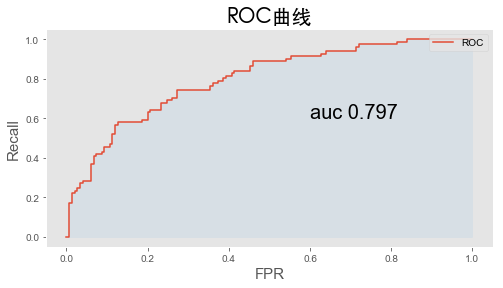

In [142]:
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc',size=10)


plt.rcParams['font.family']=['sans-serif']
# plt.rcParams['font.weight']=['blod']
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr,label='ROC')

plt.xlabel('FPR',fontsize=15)
plt.ylabel('Recall',fontsize=15)
plt.title('ROC曲线',fontproperties=font,fontsize=20)
plt.xticks(fontsize=10)
plt.grid(False)
plt.fill_between(fpr,tpr,0,color='#AED1E5',alpha=0.25)
plt.annotate(s='auc '+str(auc_score),xy=(0.6,0.6),fontsize=20)
plt.legend(loc='upper right')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_auc(y_true, y_prob, filename=False):
    fpr, tpr,threshold=roc_curve(y_true, y_prob)
    
    plt.rcParams['font.family']=['sans-serif']
    # plt.rcParams['font.weight']=['blod']
    plt.figure(figsize=(8,4))
    plt.plot(fpr, tpr,label='ROC')

    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('Recall',fontsize=15)
    plt.title('ROC曲线',fontproperties=font,fontsize=20)
    plt.xticks(fontsize=10)
    plt.grid(False)
    plt.fill_between(fpr,tpr,0,color='#AED1E5',alpha=0.25)
    plt.annotate(s='auc '+str(auc_score),xy=(0.6,0.6),fontsize=20)
    plt.legend(loc='upper right')
    
    if filename:
        plt.savefig(filename)

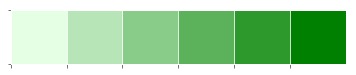

In [108]:
sns.palplot(sns.light_palette("green"))

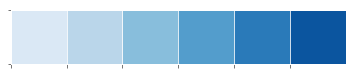

In [110]:
sns.palplot(sns.color_palette("Blues"))

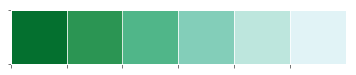

In [111]:
sns.palplot(sns.color_palette("BuGn_r"))

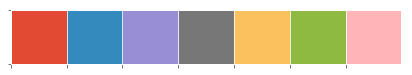

In [133]:
sns.palplot(sns.color_palette())

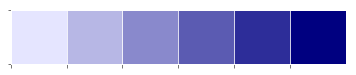

In [132]:
sns.palplot(sns.light_palette("navy"))

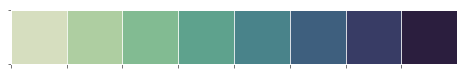

In [134]:
sns.palplot(sns.cubehelix_palette(8,start=.5,rot=-.75))
plt.show()

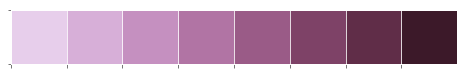

In [135]:
sns.palplot(sns.cubehelix_palette(8,start=.75,rot=-.150))
plt.show()

In [180]:
def plot_ks(y_true, y_prob, thresholds_num=1000, filename=False):
    
    thresholds = np.linspace(np.min(y_prob), np.max(y_prob), thresholds_num)
    def tpr_fpr_delta(threshold):
        y_pred = np.array([int(i>threshold) for i in y_prob])
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        tpr = tp / (tp+fn)
        fpr = fp / (fp+tn)
        delta = tpr - fpr
        return tpr, fpr, delta

    tprs, fprs, deltas = np.vectorize(tpr_fpr_delta)(thresholds)
    target_tpr = tprs[np.argmax(deltas)]
    target_fpr = fprs[np.argmax(deltas)]
    target_threshold = thresholds[np.argmax(deltas)]
    ks_value = np.max(deltas)
 
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, tprs, label='TPR', color='r', linestyle='-', linewidth=1.5)    
    plt.legend(loc='upper right')
    plt.plot(thresholds, fprs, label='FPR', color='k', linestyle='-', linewidth=1.5)
    plt.legend(loc='upper right')
    plt.xlabel('Threshold', fontsize=10)
    plt.ylabel('TPR, FPR', fontsize=10)
    plt.annotate('KS Value : {:.3f}'.format(ks_value), xy=(target_threshold+0.01, 0.5*ks_value+0.3))
    plt.xticks()
    plt.title('KS Value')


    # Ҫ���ӵ������������
    x = [[target_threshold, target_threshold]] 
    y = [[target_fpr, target_tpr]]

    for i in range(len(x)):
        plt.plot(x[i], y[i], 'b--', lw=1.5)
        plt.scatter(x[i], y[i], c='b', s=15) # s���Ƶ�Ĵ�С
        plt.annotate('TPR : {:.3f}'.format(target_tpr), xy=([target_threshold, target_tpr]), xytext=(0.3, target_tpr),
                 arrowprops=dict(arrowstyle="<-", color='r')) 
        plt.annotate('FPR : {:.3f}'.format(target_fpr), xy=([target_threshold, target_fpr]), xytext=(0.2, target_fpr),
                 arrowprops=dict(arrowstyle="<-", color='k')) 
        if filename:
            plt.savefig(filename)
        plt.show()

In [186]:
from sklearn.metrics import confusion_matrix

def plot_ks(y_true, y_prob, thresholds_num=1000):
    def tpr_fpr_delta(y_true, y_prob, threshold):
        y_pred=[int(i>threshold) for i in y_prob]
        tn, fp, fn, tp=confusion_matrix(y_true, y_pred).ravel()
        fpr=fp/(fp+tn)
        tpr=tp/(fn+tp)
        delta=tpr-fpr
        return fpr, tpr, delta

    thresholds=np.linspace(0,1,thresholds_num)
    fprs=[]
    tprs=[]
    deltas=[]
    for thres in thresholds:
        fpr, tpr, delta=tpr_fpr_delta(y_test, y_prob, thres)
        fprs.append(fpr)
        tprs.append(tpr)
        deltas.append(delta)

    max_delta_idx=np.argmax(np.array(deltas))
    ks_value=np.max(deltas)

    target_fpr=fprs[max_delta_idx]
    target_tpr=tprs[max_delta_idx]
    target_threshold=thresholds[max_delta_idx]

    x=[target_threshold, target_threshold]
    y=[target_fpr, target_tpr]

    plt.figure(figsize=(8,4))
    for i in range(len(x)):    
        plt.scatter(x[i], y[i],color='blue',s=20)

    plt.plot([x[0],y[0]],[x[1],y[1]], linestyle='--' )

    plt.plot(thresholds, tprs, label='TPR',color='r')
    plt.plot(thresholds, fprs, label='FPR',color='b')
    plt.plot(thresholds, deltas, label='KS',color='y')


    plt.annotate(s='TPR: {:.3f}'.format(target_tpr),xy=(target_threshold, target_tpr),xytext=(target_threshold, target_tpr+0.05), arrowprops=dict(arrowstyle='<-',color='k'), fontsize=15)
    plt.annotate(s='FPR: {:.3f}'.format(target_fpr),xy=(target_threshold, target_fpr),xytext=(target_threshold-0.1, target_fpr-0.1), arrowprops=dict(arrowstyle='<-',color='k'),fontsize=15)

    plt.annotate(s='KS: {:.3f}'.format(ks_value),xy=(target_threshold-0.1, ks_value+0.05), fontsize=15)

    plt.legend(loc='upper right') 

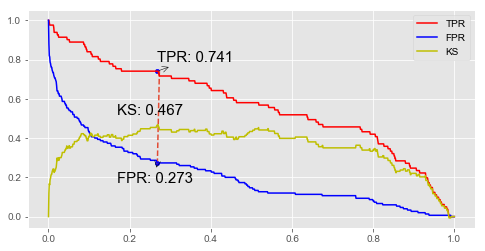

In [187]:
plot_ks(y_test,y_prob[:,1])

In [ ]:
total_score=clf.predict_proba(data.iloc[:, :-1])[:, 0]*1000
total_label=data.iloc[:,-1]

In [210]:
def plot_distribution(score,label):
    score_distribution=pd.DataFrame(dict(label=label,score=score))

    sns.distplot(score_distribution.query("label==1")['score'],color='r',label='bad')
    sns.distplot(score_distribution.query("label==0")['score'],color='g',label='good')
    
    plt.legend(loc='upper right')
    

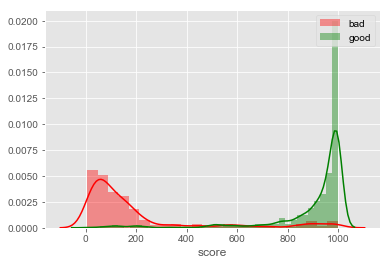

In [211]:
plot_distribution(total_score,total_label)